![BTS](https://github.com/vfp1/bts-mbds-data-science-foundations-2019/blob/master/sessions/img/Logo-BTS.jpg?raw=1)

# WEEK 3: Image processing exercises

### Victor F. Pajuelo Madrigal <victor.pajuelo@bts.tech> - Data Science Foundations (2019-10-22)

Open this notebook in Google Colaboratory: [![Open in Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/vfp1/bts-mbds-data-science-foundations-2019/blob/master/sessions/06_Image_processing.ipynb)

**Resources:**

* [SciPy](https://scipy.org)
* [Scipy Lectures](https://scipy-lectures.org)
* [NumPy](https://numpy.org)

# EXERCISE 1: image filtering [OBLIGATORY]

From the datasets (images) available from [skimage data](https://scikit-image.org/docs/dev/api/skimage.data.html), choose an **RGB** image and do the following:

* Crop the image
* Smoothen the image with a kernel filter.
* Sharpen the image with a kernel filter
* Find the edges of the image with at least two different methods.
* From the processes above, save the image that you prefer as a .jpg



In [1]:
import numpy as np
import imageio
from scipy import misc
from scipy import ndimage
import matplotlib.pyplot as plt
from skimage.util import view_as_blocks
from skimage import data

import scipy.misc

In [2]:
%matplotlib inline

<function matplotlib.pyplot.show(*args, **kw)>

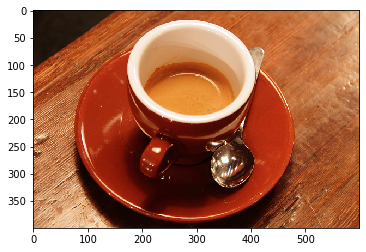

In [3]:
from skimage import data 
from skimage.io import imsave
import matplotlib.pyplot as plt
from skimage.data import coffee

coffee = data.coffee()
imsave("coffee.rgb", coffee)

plt.imshow(coffee)
plt.show

In [4]:
coffee.shape

(400, 600, 3)

<b>Crop the image

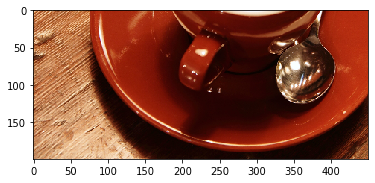

In [5]:
plt.imshow(coffee[200:400, 0:450])
plt.show()

<b>Smoothen the image with a kernel filter.

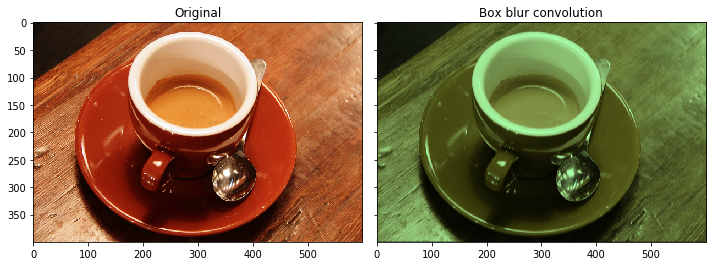

In [6]:
from skimage.data import coffee
image = coffee()
kernel=np.array([ [[1/9,1/9,1/9]], 
                  [[1/9,1/9,1/9]], 
                  [[1/9,1/9,1/9]]]) 

filtered = ndimage.convolve(image, kernel, mode='constant', cval=0.0)

fig, ax = plt.subplots(ncols=2, sharex=True, sharey=True,
                       figsize=(10, 10))

ax[0].imshow(image, cmap=plt.cm.gray)
ax[0].set_title('Original')

ax[1].imshow(filtered, cmap=plt.cm.gray)
ax[1].set_title('Box blur convolution')

plt.tight_layout()
plt.show()

<b>Sharpen the image with a kernel filter

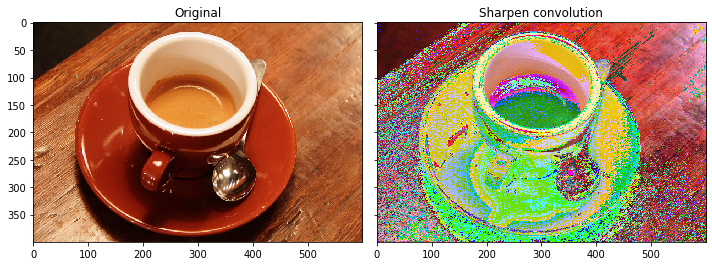

In [7]:
from skimage.data import coffee
image = coffee()
kernel=np.array([ [[0, -1, 0]], 
                  [[-1, 5, -1]], 
                  [[0, -1, 0]]]) 

filtered = ndimage.convolve(image, kernel, mode='constant', cval=0.0)

fig, ax = plt.subplots(ncols=2, sharex=True, sharey=True,
                       figsize=(10, 10))

ax[0].imshow(image, cmap=plt.cm.gray)
ax[0].set_title('Original')

ax[1].imshow(filtered, cmap=plt.cm.gray)
ax[1].set_title('Sharpen convolution')

plt.tight_layout()
plt.show()

<b>Find the edges of the image with at least two different methods.

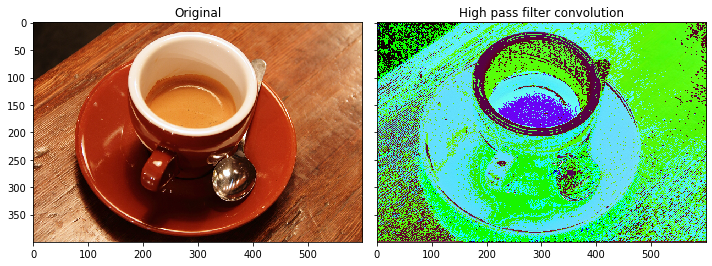

In [8]:
from skimage.data import coffee
image = coffee()
kernel=np.array([ [[-1, -1, -1]], 
                  [[-1, 8, -1]], 
                  [[-1, -1, -1]]])/9 

filtered = ndimage.convolve(image, kernel, mode='constant', cval=0.0)

fig, ax = plt.subplots(ncols=2, sharex=True, sharey=True,
                       figsize=(10, 10))

ax[0].imshow(image, cmap=plt.cm.gray)
ax[0].set_title('Original')

ax[1].imshow(filtered, cmap=plt.cm.gray)
ax[1].set_title('High pass filter convolution')

plt.tight_layout()
plt.show()

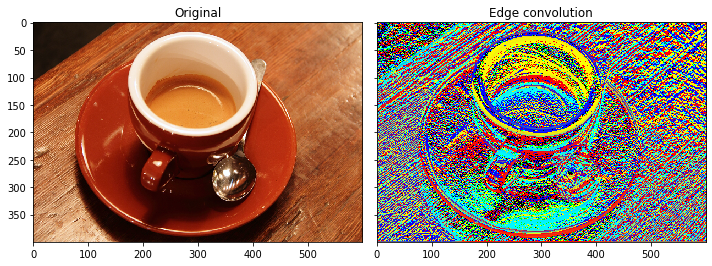

In [9]:
from skimage.data import coffee
image = coffee()
kernel=np.array([ [[1, 0, -1]], 
                  [[0, 0, 0]], 
                  [[-1, 0, 1]]])

filtered = ndimage.convolve(image, kernel, mode='constant', cval=0.0)

fig, ax = plt.subplots(ncols=2, sharex=True, sharey=True,
                       figsize=(10, 10))

ax[0].imshow(image, cmap=plt.cm.gray)
ax[0].set_title('Original')

ax[1].imshow(filtered, cmap=plt.cm.gray)
ax[1].set_title('Edge convolution')

plt.tight_layout()
plt.show()

<b>From the processes above, save the image that you prefer as a .jpg

In [10]:
coffee = data.coffee()
imsave('coffee.jpg', coffee)

# EXERCISE 2: image segmentation [OBLIGATORY]

Take a picture with your phone or your camera of some objects that you want to count. (Beware: try to take high contrast images with a stable background).

* Load the image with scikit image
* Count the objects in the image using region based segmentation
* Try to fix the image using opening/closing algorithms



<b>Load the image with scikit image

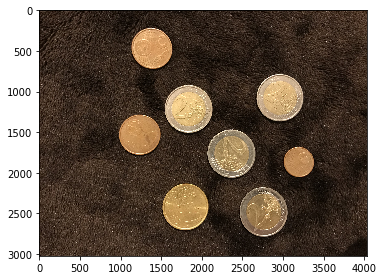

In [19]:
from skimage.io import imread, imshow
my_image=imread('IMG_6293.JPG')
imshow(my_image)

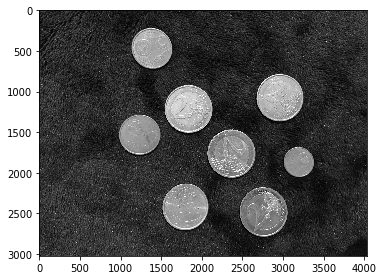

In [21]:
my_image=imread('IMG_6293.JPG', as_gray=True)
imshow(my_image)

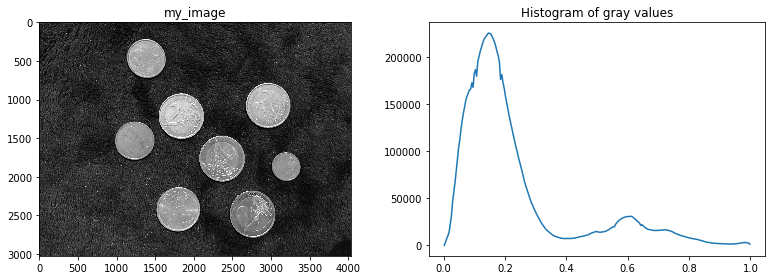

In [23]:
from skimage import data
from skimage.exposure import histogram
hist, hist_centers= histogram(my_image)
fig, ax = plt.subplots(ncols=2, sharex=False, sharey=False,
                      figsize=(11,4))
ax[0].imshow(my_image, cmap=plt.cm.gray)
ax[0].set_title('my_image')

ax[1].plot(hist_centers, hist)
ax[1].set_title('Histogram of gray values')
plt.tight_layout()
plt.show()

<b>Count the objects in the image using region based segmentation

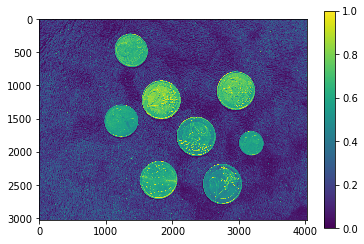

In [49]:
plt.imshow(my_image)
plt.colorbar()
plt.show()



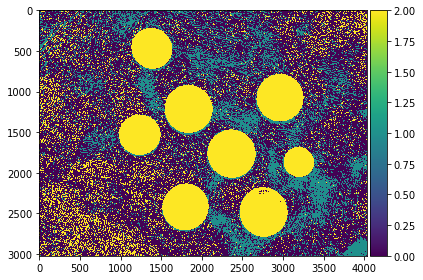

In [105]:
# Let's create a zeros array with the same shape as coins
markers = np.zeros_like(my_image)

# When the pixels are below 30 (see image above), we can label as background(1)
markers[my_image < 0.1] = 1

# When the pixels are above 150 (see image above), we can label as coins(2)
markers[my_image > 0.25] = 2
imshow(markers)

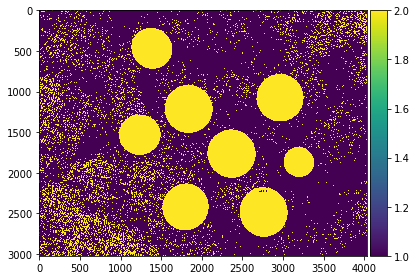

In [106]:
from skimage.morphology import watershed
segmentation = watershed(my_image, markers)
imshow(segmentation)

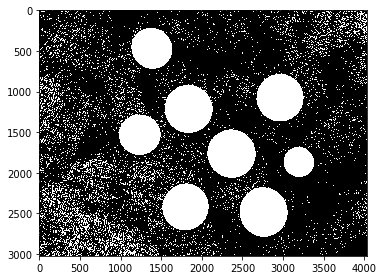

In [102]:
# Remove the background values before filling!
from scipy import ndimage as ndi
segmentation_treshold = ndi.binary_fill_holes(segmentation-1)
imshow(segmentation_treshold)

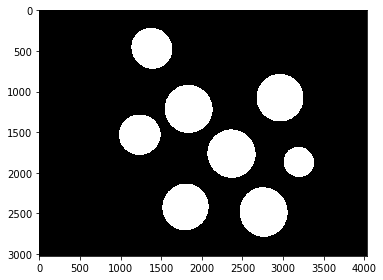

In [114]:
segmentation_treshold = ndi.binary_fill_holes(segmentation-1)
open_segmentation=ndimage.binary_opening(segmentation_treshold, structure=np.ones((30,30)))

imshow(open_segmentation)

8


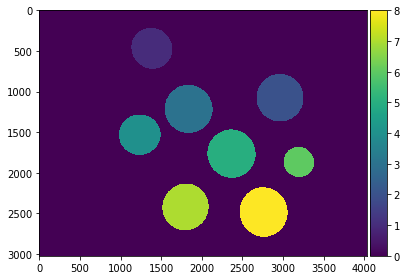

In [115]:
label_objects, nb_labels = ndi.label(open_segmentation)
print(nb_labels)
imshow(label_objects)